<a href="https://colab.research.google.com/github/DevilGod007/Terminator/blob/main/TEMPERATURE_SENSOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ICT INTERNSHIP (SCMS SCHOOL OF ENGINEERING AND TECHNOLOGY)

-GROUP MEMBERS:
        
        
              1)AKASH V NAIR
              2)ALEENA ANN ALEXANDER
              3)ALAN P
              4)AADILA ANIL

-PROJECT:TEMPERATURE SENSOR(IOT AND SENSOR DATA)

-DATASET FROM KAGGLE:https://www.kaggle.com/datasets/atulanandjha/temperature-readings-iot-devices


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data=pd.read_csv('/content/IOT-temp.csv')


In [ ]:
data.head()

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In


In [ ]:
data.tail()

,id,room_id/id,noted_date,temp,out/in
97601,__export__.temp_log_91076_7fbd08ca,Room Admin,28-07-2018 07:07,31,In
97602,__export__.temp_log_147733_62c03f31,Room Admin,28-07-2018 07:07,31,In
97603,__export__.temp_log_100386_84093a68,Room Admin,28-07-2018 07:06,31,In
97604,__export__.temp_log_123297_4d8e690b,Room Admin,28-07-2018 07:06,31,In
97605,__export__.temp_log_133741_32958703,Room Admin,28-07-2018 07:06,31,In


In [ ]:
data.shape

(97606, 5)

In [ ]:
data.columns

Index(['id', 'room_id/id', 'noted_date', 'temp', 'out/in'], dtype='object')

In [ ]:
data.dtypes

,0
id,object
room_id/id,object
noted_date,object
temp,int64
out/in,object


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97606 entries, 0 to 97605
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          97606 non-null  object
 1   room_id/id  97606 non-null  object
 2   noted_date  97606 non-null  object
 3   temp        97606 non-null  int64 
 4   out/in      97606 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.7+ MB


In [ ]:
data.describe()

,temp
count,97606.000000
mean,35.053931
std,5.699825
min,21.000000
25%,30.000000
50%,35.000000
75%,40.000000
max,51.000000


In [ ]:
data.isna().sum()

,0
id,0
room_id/id,0
noted_date,0
temp,0
out/in,0


In [ ]:
data['out/in'].unique()


array(['In', 'Out'], dtype=object)

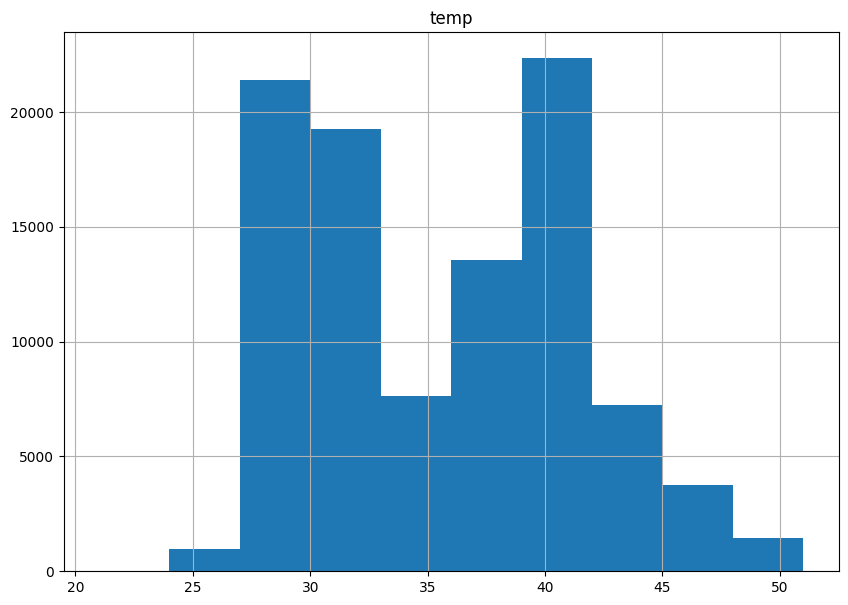

In [ ]:
import matplotlib.pyplot as plt
freqgraph = data.select_dtypes(include=['int64',])     #Selecting variables to plot
freqgraph.hist(figsize=(10,7))     #Plotting the histogram
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Select the columns to scale
columns_to_scale = [ 'temp']

# Fit the scaler on the selected columns and transform the data
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

# Print the scaled data
data.head()

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,0.266667,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,0.266667,In
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,0.666667,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,0.666667,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,0.333333,In


In [ ]:
columns_to_count = ['room_id/id', 'temp']
unique_value_counts = {col: data[col].nunique() for col in columns_to_count}


for col, count in unique_value_counts.items():
    print(f"Number of unique values in '{col}': {count}")

Number of unique values in 'room_id/id': 1
Number of unique values in 'temp': 31


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
columns_to_encode = ['room_id/id','temp']

for col in columns_to_encode:
    data[col] = encoder.fit_transform(data[col])


data.head()

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,0,08-12-2018 09:30,8,In
1,__export__.temp_log_196131_7bca51bc,0,08-12-2018 09:30,8,In
2,__export__.temp_log_196127_522915e3,0,08-12-2018 09:29,20,Out
3,__export__.temp_log_196128_be0919cf,0,08-12-2018 09:29,20,Out
4,__export__.temp_log_196126_d30b72fb,0,08-12-2018 09:29,10,In


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming 'data' is your DataFrame
# Convert 'noted_date' to datetime objects, specifying the correct format
data['noted_date'] = pd.to_datetime(data['noted_date'], format='%d-%m-%Y %H:%M', errors='coerce')

# Extract numerical features from 'noted_date'
data['year'] = data['noted_date'].dt.year
data['month'] = data['noted_date'].dt.month
data['day'] = data['noted_date'].dt.day
data['hour'] = data['noted_date'].dt.hour

# Drop the original 'noted_date' and 'id' columns
X = data.drop(['out/in', 'id', 'noted_date'], axis=1)
y = data['out/in']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Create and train the DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9304374551787726


In [ ]:
## prediction
# Assuming you have a new data point in a dictionary or list format
new_data_point = {'room_id/id': 1, 'temp': 24, 'year': 2024, 'month': 2, 'day': 23, 'hour': 10}
# Adjust these values according to your specific features

# Convert the new data point to a pandas DataFrame
new_data = pd.DataFrame([new_data_point])

# Make predictions using the trained model
prediction = dt_classifier.predict(new_data)

# Print or use the prediction
print("Prediction:", prediction[0])

Prediction: Out


Text(0, 0.5, 'Predicted Values')

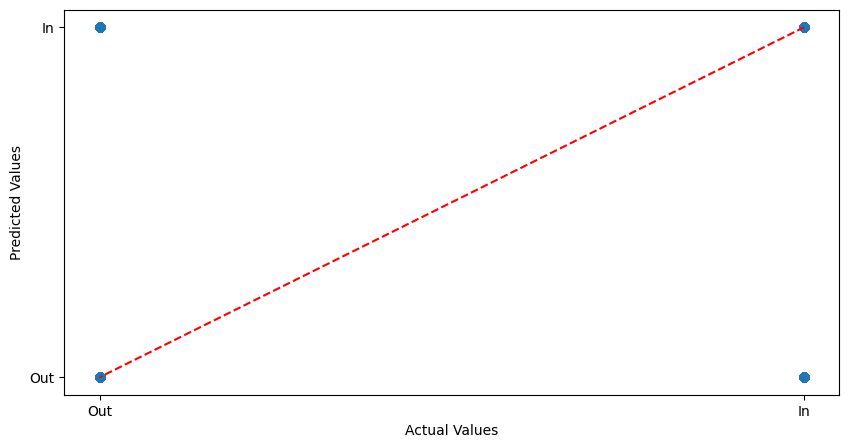

In [ ]:
#Scatter plot
import matplotlib.pyplot as plt
import numpy as np

y_test = np.array(y_test)
y_pred = np.array(y_pred)
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Create a scatter plot


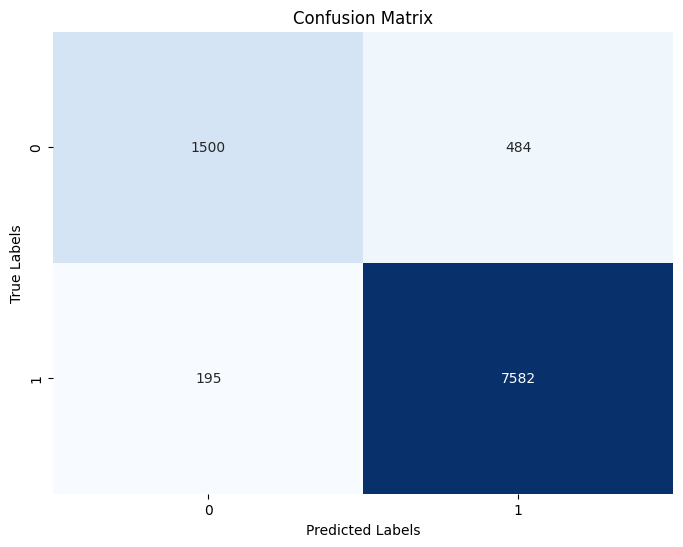

In [ ]:
# confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
# Calculate the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()